# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 9.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

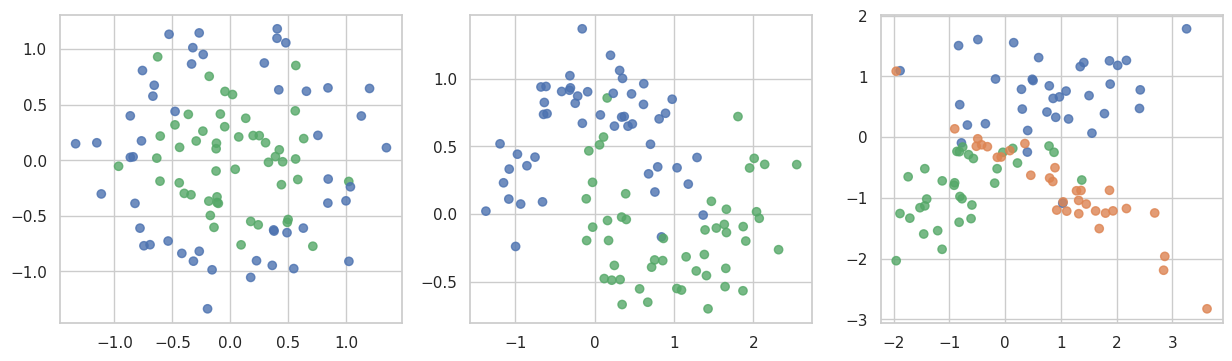

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [31]:
from sklearn.metrics import accuracy_score

def fit_default_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    
    test_pred = clf1.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)

    return train_acc, test_acc

In [32]:
for i, (x, y) in enumerate(datasets):
    train_acc, test_acc = fit_default_tree(x, y)
    print(f'dataset {i}, train_accuracy: {train_acc}, test_accuracy: {test_acc}')

dataset 0, train_accuracy: 1.0, test_accuracy: 0.7
dataset 1, train_accuracy: 1.0, test_accuracy: 0.55
dataset 2, train_accuracy: 1.0, test_accuracy: 0.6


Дефолтные деревья идеально подогнались под обучающую выборку

In [33]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

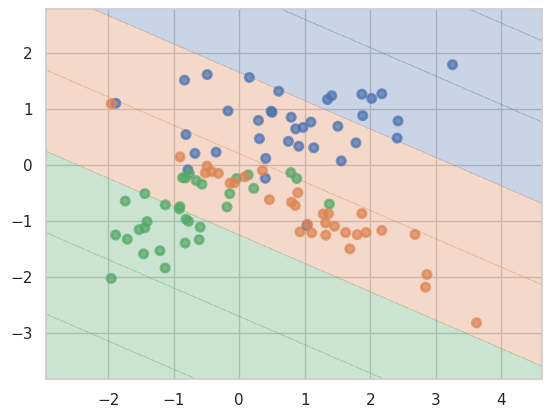

In [34]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

accuracy: 1.0


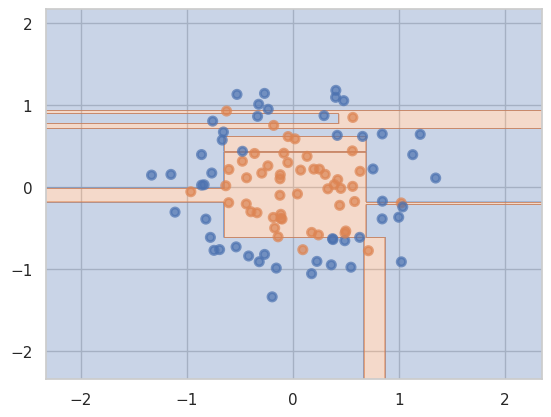

In [43]:
X, y = datasets[0]
clf  = DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(X)
print(f'accuracy: {accuracy_score(y, y_pred)}')
plot_surface(clf, X, y)

accuracy: 1.0


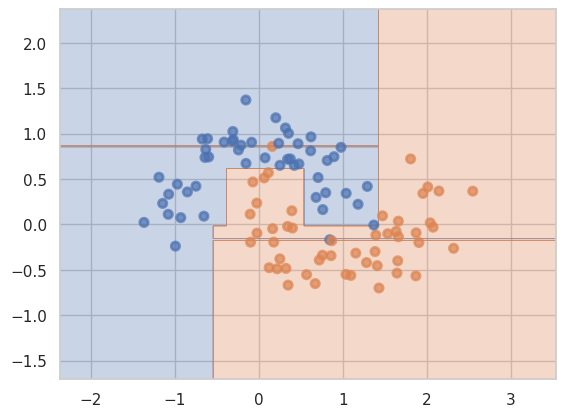

In [44]:
X, y = datasets[1]
clf  = DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(X)
print(f'accuracy: {accuracy_score(y, y_pred)}')
plot_surface(clf, X, y)

accuracy: 1.0


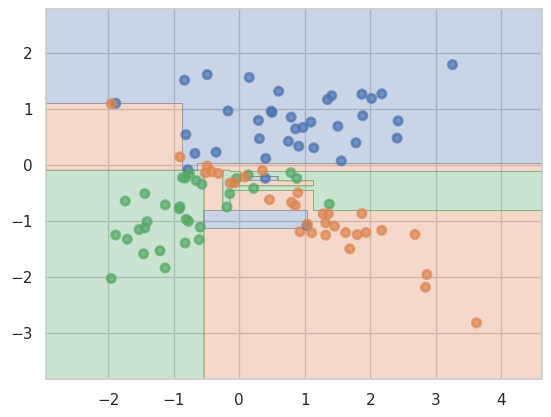

In [45]:
X, y = datasets[2]
clf  = DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(X)
print(f'accuracy: {accuracy_score(y, y_pred)}')
plot_surface(clf, X, y)

__Ответ:__ деревья сильно переобучаются. Видно, что точность на обучающих выборках 1, на тестовых - меньше. По картинкам это тоже видно по очень узким полосам, которые подогнанны под конкретные объекты.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [142]:
def check_tree(dataset = 0, **kwargs):
    X, y = datasets[dataset]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(**kwargs)
    clf = clf.fit(X_train,y_train)

    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'dataset {dataset}, train_accuracy: {train_acc}, test_accuracy: {test_acc}')
    plot_surface(clf, X, y)
    return None

## 1 датасет

default params
dataset 0, train_accuracy: 1.0, test_accuracy: 0.7


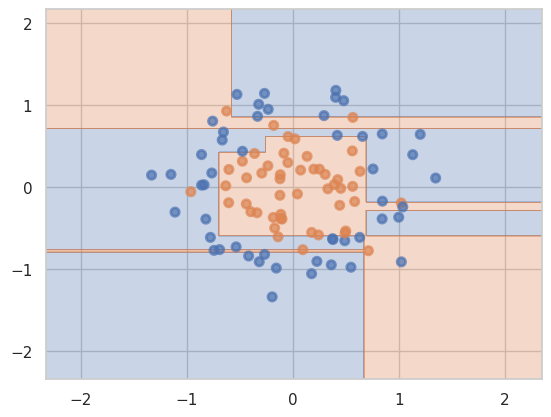

In [180]:
params = 'default params'
print(params)
check_tree()

{'max_depth': 1}
dataset 0, train_accuracy: 0.7, test_accuracy: 0.45


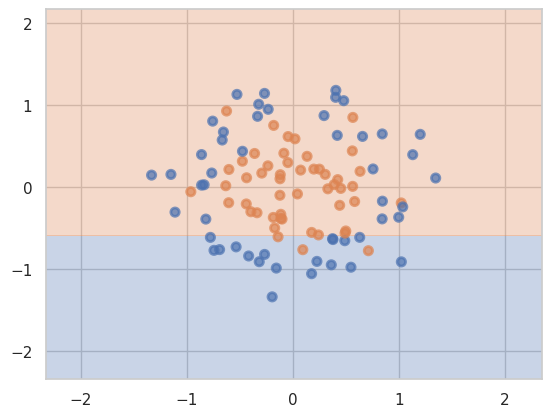

In [182]:
#уменьшим глубину(недообучается)
params = {'max_depth': 1}
print(params)
check_tree(**params)

{'max_depth': 3}
dataset 0, train_accuracy: 0.875, test_accuracy: 0.7


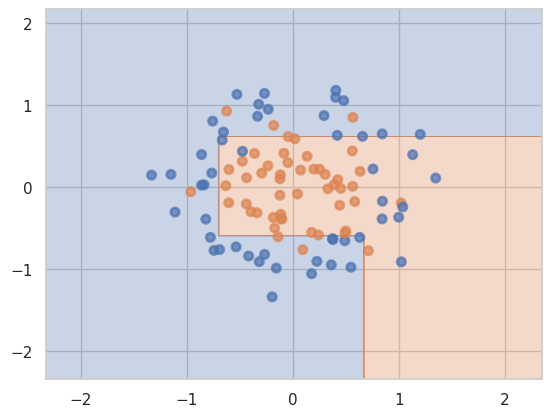

In [183]:
#уменьшим глубину(недообучается)
params = {'max_depth': 3}
print(params)
check_tree(**params)

{'max_depth': 3, 'min_samples_split': 4}
dataset 0, train_accuracy: 0.875, test_accuracy: 0.7


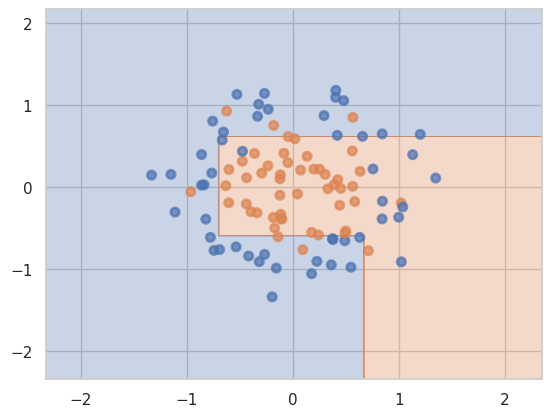

In [184]:
params = {'max_depth': 3, 'min_samples_split': 4}
print(params)
check_tree(**params)

{'max_depth': 3, 'min_samples_split': 20}
dataset 0, train_accuracy: 0.8625, test_accuracy: 0.75


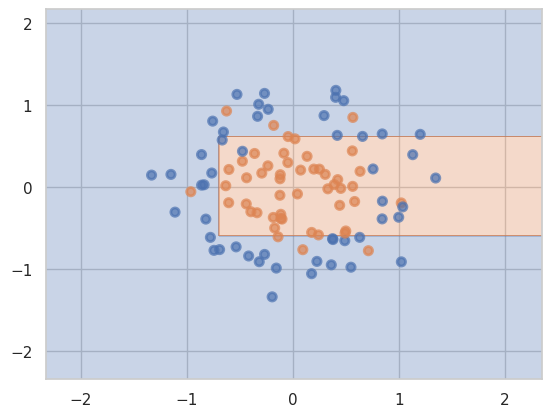

In [187]:
params = {'max_depth': 3, 'min_samples_split': 20}
print(params)
check_tree(**params)

{'max_depth': 4, 'min_samples_split': 4}
dataset 0, train_accuracy: 0.9625, test_accuracy: 0.7


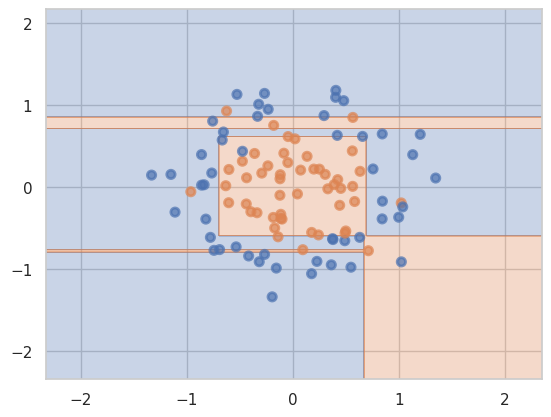

In [188]:
params = {'max_depth': 4, 'min_samples_split': 4}
print(params)
check_tree(**params)

{'max_depth': 4, 'min_samples_split': 9}
dataset 0, train_accuracy: 0.95, test_accuracy: 0.75


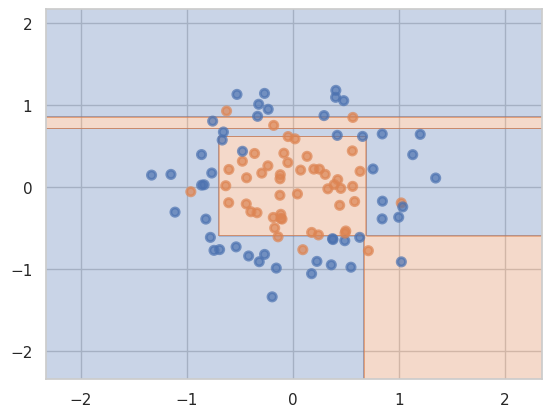

In [189]:
params = {'max_depth': 4, 'min_samples_split': 9}
print(params)
check_tree(**params)

{'max_depth': 4, 'min_samples_leaf': 4}
dataset 0, train_accuracy: 0.925, test_accuracy: 0.75


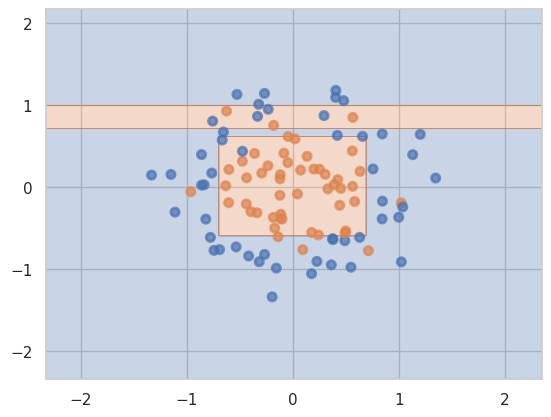

In [194]:
params = {'max_depth': 4, 'min_samples_leaf': 4}
print(params)
check_tree(**params)

{'max_depth': 4, 'min_samples_leaf': 6}
dataset 0, train_accuracy: 0.9, test_accuracy: 0.9


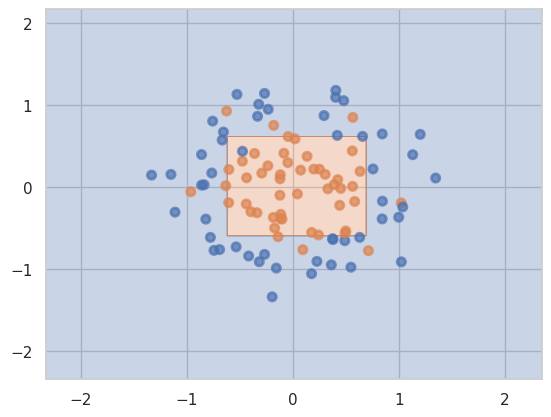

In [195]:
params = {'max_depth': 4, 'min_samples_leaf': 6}
print(params)
check_tree(**params)

In [147]:
#по ощущениям такой квадратик самый лучший, проверим

In [158]:
def find_best_tree(dataset = 0):
    X, y = datasets[dataset]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    max_depth =  np.arange(2,20)
    min_samples_split = np.arange(2, 20)
    min_samples_leaf = np.arange(1,20)

    all_variants = list(product(max_depth, min_samples_split, min_samples_leaf))
    best_params = {'max_depth': np.nan, 'min_samples_split': np.nan, 'min_samples_leaf': np.nan}
    best_acc = 0
    
    for max_depth, min_samples_split, min_samples_leaf in all_variants:
        clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
        clf = clf.fit(X_train,y_train)
        test_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        if test_acc>best_acc:
            best_acc = test_acc
            best_params['max_depth'] = max_depth
            best_params['min_samples_split'] = min_samples_split
            best_params['min_samples_leaf'] = min_samples_leaf
            
    print(f'dataset {dataset}, best_test_accuracy: {best_acc}')
    print(best_params)
    cls = DecisionTreeClassifier(**best_params)
    plot_surface(clf, X, y)
    return None

dataset 0, best_test_accuracy: 0.9
{'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6}


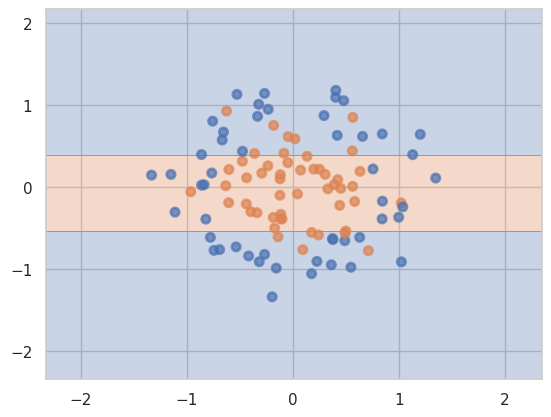

In [159]:
find_best_tree(0)

Для данного датасета судя по всему достаточно глубины 2(или 4, если нужно выделить квадратик по центру)

## 2 датасет

default params
dataset 1, train_accuracy: 1.0, test_accuracy: 0.95


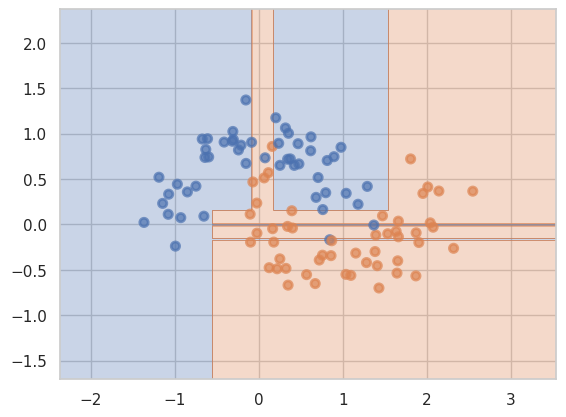

In [165]:
params = 'default params'
print(params)
check_tree(dataset = 1)

{'max_depth': 3}
dataset 1, train_accuracy: 0.9125, test_accuracy: 1.0


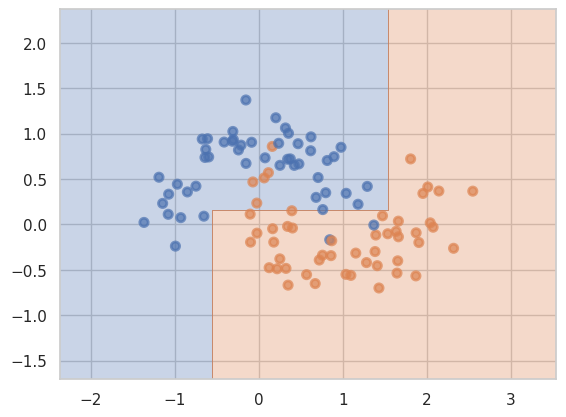

In [168]:
params = {'max_depth': 3}
print(params)
check_tree(**params, dataset = 1)

{'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 3}
dataset 1, train_accuracy: 0.9625, test_accuracy: 0.95


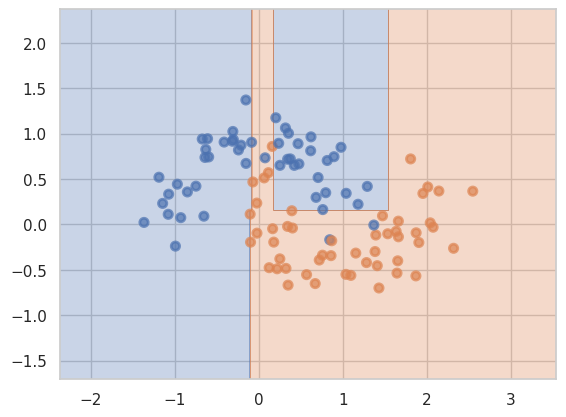

In [170]:
params = {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 3}
print(params)
check_tree(**params, dataset = 1)

{'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2}
dataset 1, train_accuracy: 0.9125, test_accuracy: 1.0


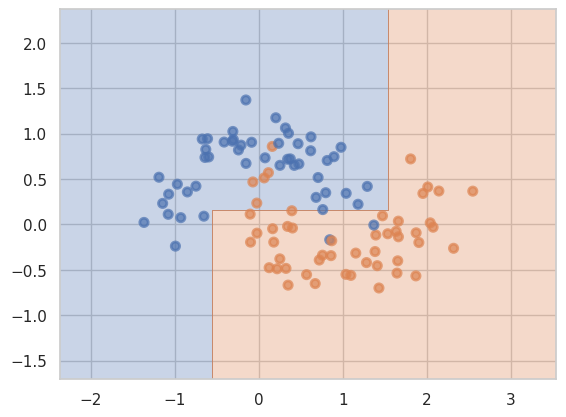

In [171]:
params = {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2}
print(params)
check_tree(**params, dataset = 1)

In [174]:
#повезло с тестовой выборкой раз точность 1

## 3 датасет

default params
dataset 2, train_accuracy: 1.0, test_accuracy: 0.7


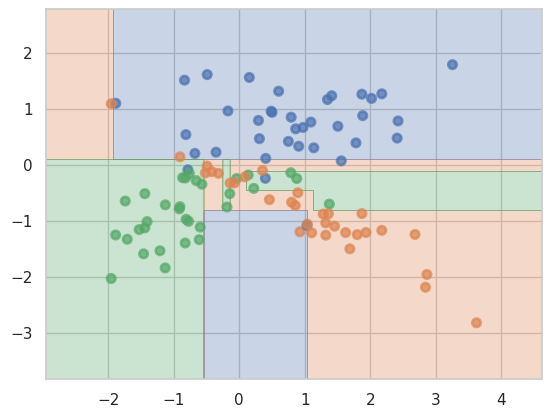

In [175]:
params = 'default params'
print(params)
check_tree(dataset = 2)

{'max_depth': 3}
dataset 2, train_accuracy: 0.9, test_accuracy: 0.75


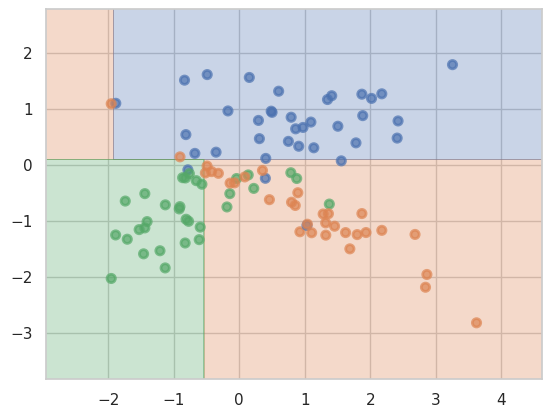

In [176]:
#уменьшим глубину
params = {'max_depth': 3}
print(params)
check_tree(**params, dataset = 2)

{'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 3}
dataset 2, train_accuracy: 0.8875, test_accuracy: 0.75


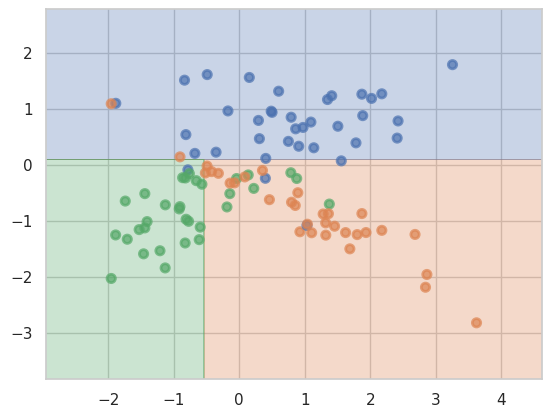

In [177]:
params = {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 3}
print(params)
check_tree(**params, dataset = 2)

{'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2}
dataset 2, train_accuracy: 0.8875, test_accuracy: 0.75


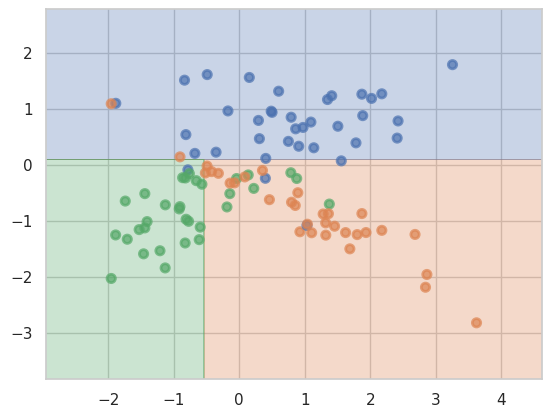

In [178]:
params = {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2}
print(params)
check_tree(**params, dataset = 2)

dataset 2, best_test_accuracy: 0.8
{'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3}


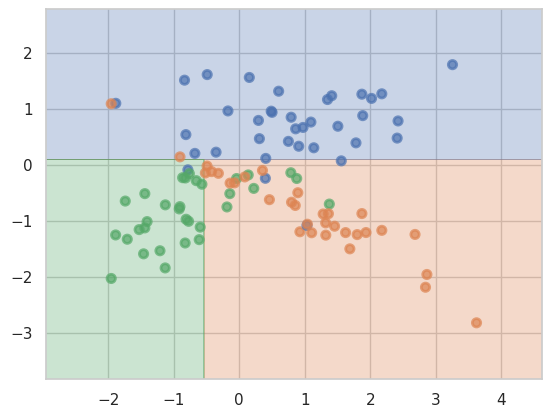

In [179]:
find_best_tree(dataset = 2)

__Ответ:__ При уменьшении максимальной глубины становится меньше линий на картинке, решение упрощается. Слишком сильное упрощение помешает выучить закономерность. Например, в первом датасете, квадратик по центру нельзя выучить с глубиной 2. \
При больших min_samples_split, min_samples_leaf дерево как правило не дорастает до максимульной глубины. \
Для каждого датасета свои идеальные параметры, но по сути изменения параметров приводят к одному и тому же(упрощению или усложнению разделяющей поверхности)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [2]:
from hw5code import find_best_split
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


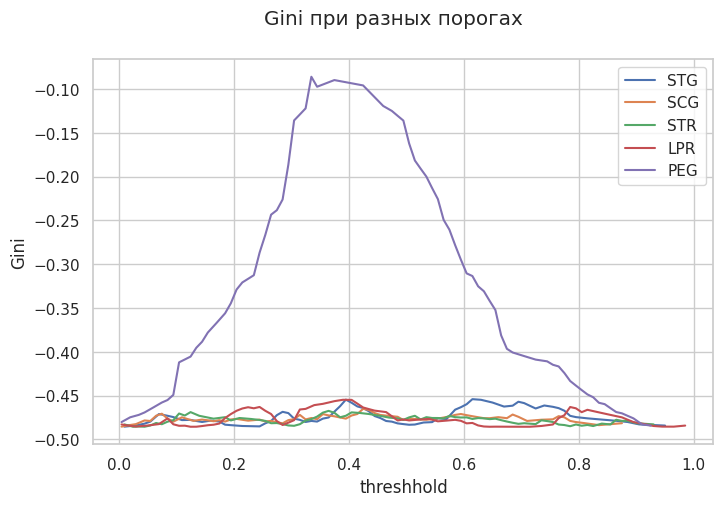

In [3]:
plt.figure(figsize = (8, 5))
for col in data.columns[:-1]:
    thresholds, ginis, _, _ = find_best_split(data[col].values, data['UNS'].values)
    plt.plot(thresholds, ginis, label = col)
plt.legend()
plt.xlabel('threshhold')
plt.ylabel('Gini')
plt.suptitle('Gini при разных порогах')
plt.show()

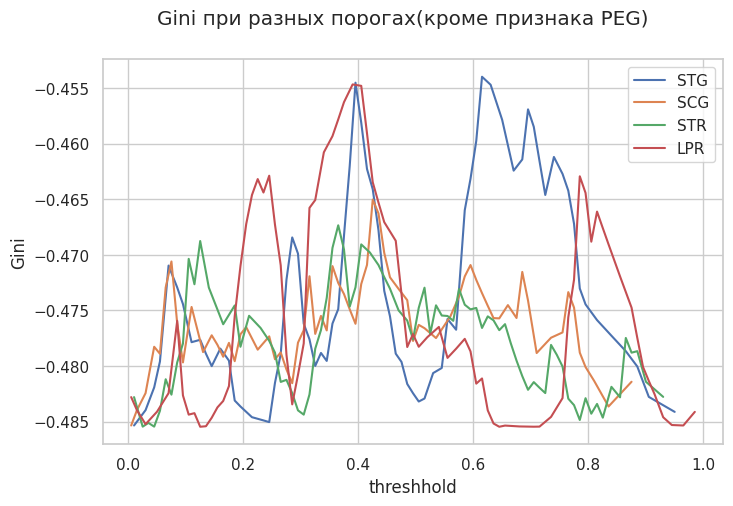

In [4]:
plt.figure(figsize = (8, 5))
for col in data.columns[:-1]:
    if col == 'PEG':
        continue
    thresholds, ginis, _, _ = find_best_split(data[col].values, data['UNS'].values)
    plt.plot(thresholds, ginis, label = col)
plt.legend()
plt.xlabel('threshhold')
plt.ylabel('Gini')
plt.suptitle('Gini при разных порогах(кроме признака PEG)')
plt.show()

In [5]:
len(data.columns[:-1])

5

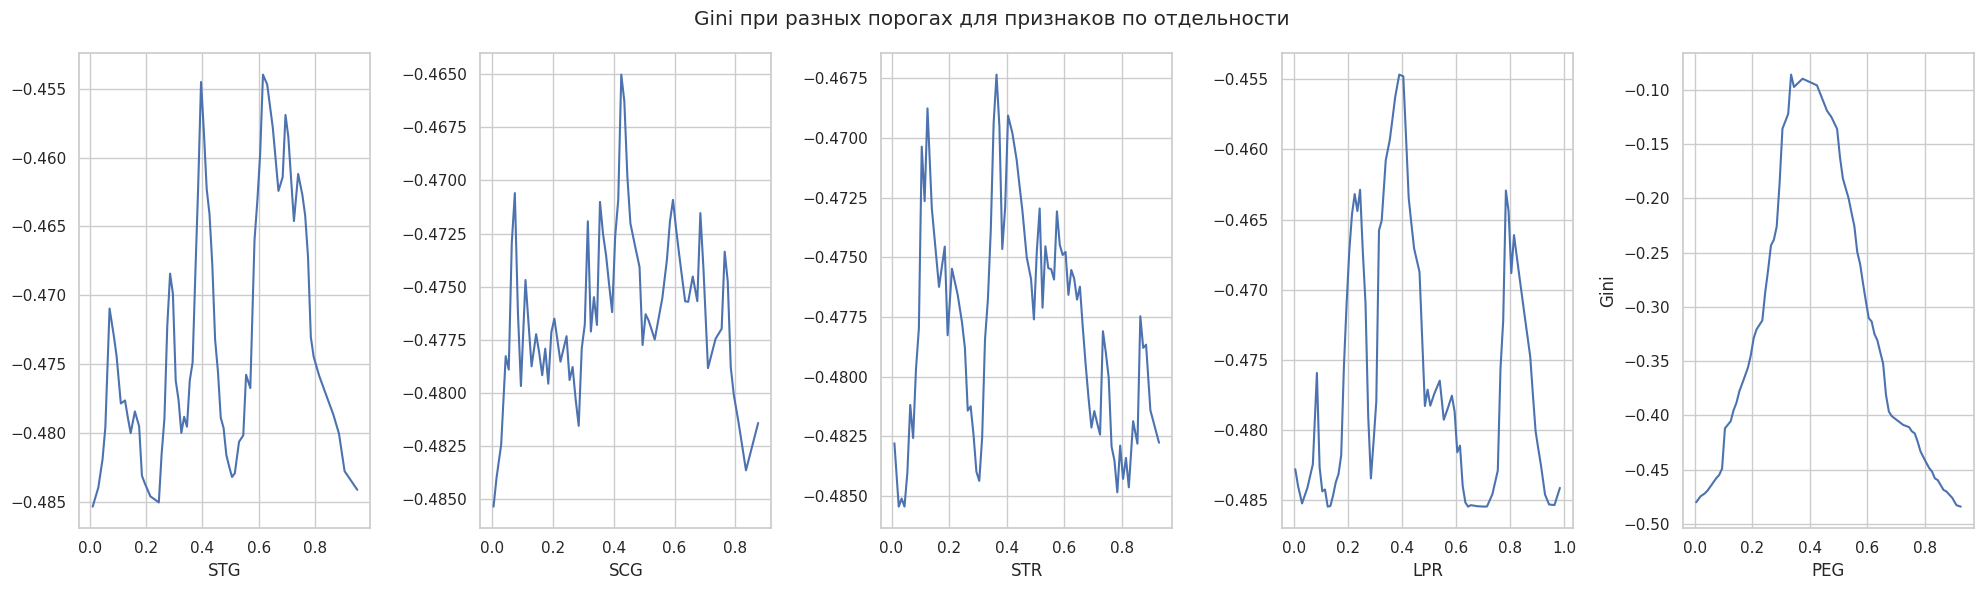

In [6]:
plt.figure(figsize = (20, 6))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(1, 5, i+1)
    thresholds, ginis, _, _ = find_best_split(data[col].values, data['UNS'].values)
    plt.plot(thresholds, ginis)
    plt.xlabel(col)
plt.ylabel('Gini')
plt.suptitle('Gini при разных порогах для признаков по отдельности')
plt.tight_layout()
plt.show()

In [7]:
def plot_feature(X, target):
    mask = target == 1
    plt.scatter(X[mask][:,0], X[mask][:, 1], c='tomato', label='class 1, objects')
    mask = np.logical_not(mask)
    plt.scatter(X[mask][:, 0], X[mask][:, 1], c='skyblue', label='class 0, objects')  

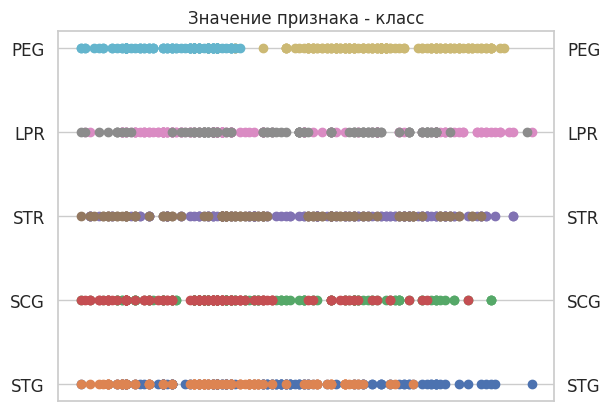

In [8]:
first_class = data['UNS'] == 1
zero_class = data['UNS'] == 0
for i, col in enumerate(data.columns[:-1]):
    plt.scatter(data.loc[first_class, col].values, [i]*sum(first_class))
    plt.scatter(data.loc[zero_class, col].values, [i]*sum(zero_class))

plt.yticks(np.arange(5),labels=data.columns[:-1], fontsize=12)
plt.tick_params(axis='y', labelright='on')
plt.tick_params(axis='y', labelleft='off')
plt.title('Значение признака - класс')
plt.xticks([])
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Видно, что по признаку PEG можно легко разделить 2 класса. Именно у этого признака были очень большие Gini. Кривая для "хороших признаков" нарастает до некоторого значения, потом встречается лучший порог, который почти идеально делит на 2 части, после чего происходит убывание gini. У "плохих"признаков график прыгает то вверх, то вниз.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [9]:
from hw5code import *

In [10]:
from sklearn.preprocessing import LabelEncoder
mush = pd.read_csv('mushroom/agaricus-lepiota.data', header = None)
mush.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
mush_enc = mush.apply(LabelEncoder().fit_transform)
mush_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


poisonous: '1', edible: '0'

In [12]:
from sklearn.model_selection import train_test_split
X, y = np.array(mush_enc.loc[:,1:]), np.array(mush_enc.loc[:,0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 45)

In [13]:
feature_types = ['categorical' for i in range(X_train.shape[1])]

In [14]:
%%time
my_tree = DecisionTree(feature_types)
my_tree.fit(X_train, y_train)

CPU times: user 219 ms, sys: 10.2 ms, total: 229 ms
Wall time: 225 ms


In [15]:
from sklearn.metrics import accuracy_score
train_pred = my_tree.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)

test_pred = my_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, test_pred)
print(f'train accuracy: {accuracy_train}\ntest accuracy: {accuracy_test}')

train accuracy: 1.0
test accuracy: 0.999015263417036


In [16]:
my_tree._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [3, 0, 5],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [2, 3, 4, 0, 8, 1, 6, 7],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [3, 2, 6, 5, 7, 4],
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'categories_split': [2, 3, 0],
    'left_child': {'type': 'nonterminal',
     'feature_split': 14,
     'categories_split': [3, 7, 2, 6, 5],
     'left_child': {'type': 'terminal', 'class': 0},
     'right_child': {'type': 'nonterminal',
      'feature_split': 10,
      'categories_split': [1],
      'left_child': {'type': 'terminal', 'class': 0},
      'right_child': {'type': 'terminal', 'class': 1}}},
    'right_child': {'type': 'terminal', 'class': 1}},
   'right_child': {'type': 'terminal', 'class': 1}},
  'right_child': {'type': 'terminal', 'class': 1}},
 'right_child': {'type': 'terminal', 'class': 1}}

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [19]:
mushroom = pd.read_csv('mushroom/agaricus-lepiota.data', header = None)
tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
cars = pd.read_csv('car_evaluation/car.data')
nursery = pd.read_csv('nursery/nursery.data')

In [20]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [21]:
cars = cars.rename(columns = {'unacc':'target'})

mask = ((cars.loc[:, 'target'] == 'unacc') | (cars.loc[:, 'target'] == 'acc'))
cars.loc[mask, 'target'] = 1
cars.loc[~mask, 'target'] = 0

In [22]:
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [23]:
tic_tac_toe = tic_tac_toe.rename(columns = {'V10':'target'})
mushroom = mushroom.rename(columns = {0:'target'})

In [24]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [25]:
nursery = nursery.rename(columns = {'recommend':'target'})#.drop(columns = ['recommended'])

mask = ((nursery.loc[:, 'target'] == 'not_recom') | (nursery.loc[:, 'target'] == 'recommend'))
nursery.loc[mask, 'target'] = 0
nursery.loc[~mask, 'target'] = 1

In [26]:
def compare_algos(feat, targ):
    result_dict = {}
    result_dict['real'] = [cross_val_score(DecisionTree(['real' for x in feat.columns]), 
                                          feat.values, targ.values, cv=10, scoring="accuracy").mean()]

    result_dict['cat'] = [cross_val_score(DecisionTree(['categorical' for x in feat.columns]), 
                                         feat.values, targ.values, cv=10, scoring="accuracy").mean()]
    
    feat_one_hot = OneHotEncoder(sparse=False).fit_transform(feat)
    result_dict['real + oh'] = [cross_val_score(DecisionTree(['real'] * feat_one_hot.shape[1]), 
                                       feat_one_hot, targ.values, cv=10, scoring="accuracy").mean()]
    
    result_dict['sklearn'] = [cross_val_score(DecisionTreeClassifier(), feat.values, targ.values, cv=10,
                                            scoring="accuracy").mean()]
    
    return pd.DataFrame.from_dict(result_dict)

In [27]:
from sklearn.preprocessing import LabelEncoder
mushroom = mushroom.apply(LabelEncoder().fit_transform)
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)
cars = cars.apply(LabelEncoder().fit_transform)
nursery = nursery.apply(LabelEncoder().fit_transform)

In [28]:
datasets = [mushroom, tic_tac_toe, cars, nursery]

feat_list = [dataset.drop(columns = ['target']) for dataset in datasets]
target_list = [dataset['target'] for dataset in datasets]

In [29]:
results = pd.DataFrame()
for i in range(4):
    curr_res = compare_algos(feat_list[i], target_list[i])
    results = pd.concat([results, curr_res])

In [31]:
results

,real,cat,real + oh,sklearn
0,0.999261,1.000000,0.999631,0.961123
0,0.467533,0.541458,0.543575,0.760219
0,0.942600,0.965194,0.921767,0.944952
0,0.999846,0.999923,0.999769,0.999846


In [32]:
results.index = ['mushrooms', 'tictactoe', 'cars', 'nursery']

In [33]:
results

,real,cat,real + oh,sklearn
mushrooms,0.999261,1.000000,0.999631,0.961123
tictactoe,0.467533,0.541458,0.543575,0.760219
cars,0.942600,0.965194,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Точность довольно высокая везде кроме tictactoe. Возможно из-за дисбаланса классов в этом датасете.\
В целом видно, что рассмотрение признаков как категориальных улучшает результат. Что логично, тк в действительности они и есть категориальные, а если рассматривать как вещественные, то возникает искусственное введение порядка, неверная информация.

contest\
ex1 https://contest.yandex.ru/contest/56884/run-report/102721357/ \
ex2 https://contest.yandex.ru/contest/56884/problems/B/